Loads `Google-Playstore.csv` into a DataFrame and imports libraries for data analysis, visualization, and statistics.

In [88]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as mplp
import seaborn as sns
import scipy.stats as stats
data=pd.read_csv(r'Google-Playstore.csv')

### Descriptive Stats of Data


In [3]:
data.describe()

,Rating,Rating Count,Minimum Installs,Maximum Installs,Price
count,2.290061e+06,2.290061e+06,2.312837e+06,2.312944e+06,2.312944e+06
mean,2.203152e+00,2.864839e+03,1.834452e+05,3.202017e+05,1.034992e-01
std,2.106223e+00,2.121626e+05,1.513144e+07,2.355495e+07,2.633127e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,5.000000e+01,8.400000e+01,0.000000e+00
50%,2.900000e+00,6.000000e+00,5.000000e+02,6.950000e+02,0.000000e+00
75%,4.300000e+00,4.200000e+01,5.000000e+03,7.354000e+03,0.000000e+00
max,5.000000e+00,1.385576e+08,1.000000e+10,1.205763e+10,4.000000e+02


### Which app category has most apps (top 20)?

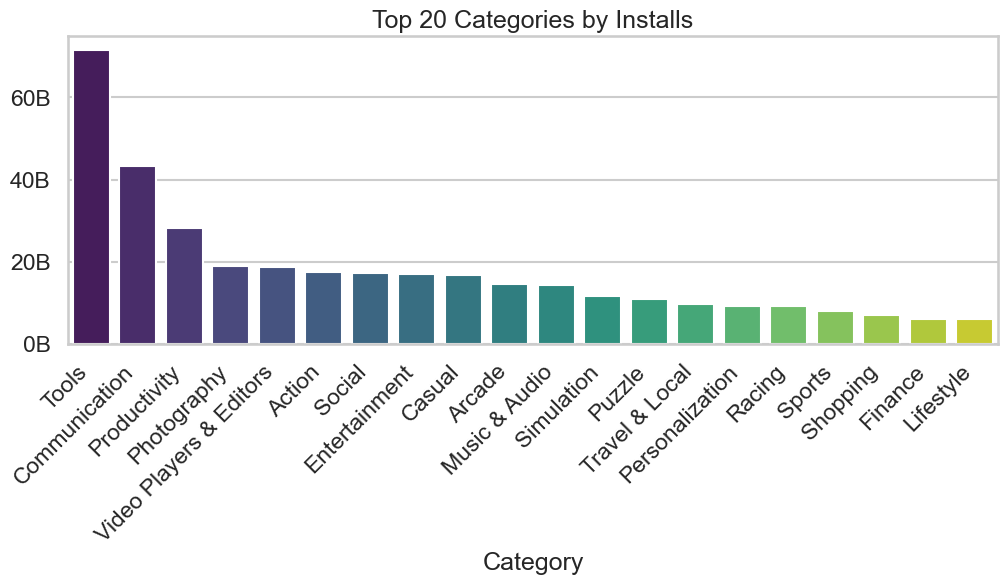

In [4]:
from matplotlib.ticker import FuncFormatter
sns.set_theme(style="whitegrid", context="talk")

cat = data.groupby('Category')['Minimum Installs'].sum().nlargest(20)

mplp.figure(figsize=(12,4))
ax = sns.barplot(x=cat.index, y=cat.values, hue=cat.index, legend=False, palette="viridis")
ax.yaxis.set_major_formatter(lambda x, _: f"{int(x/1000000000)}B")
mplp.xticks(rotation=45, ha="right")
mplp.title("Top 20 Categories by Installs")
mplp.show()


### What is average Rating per category?

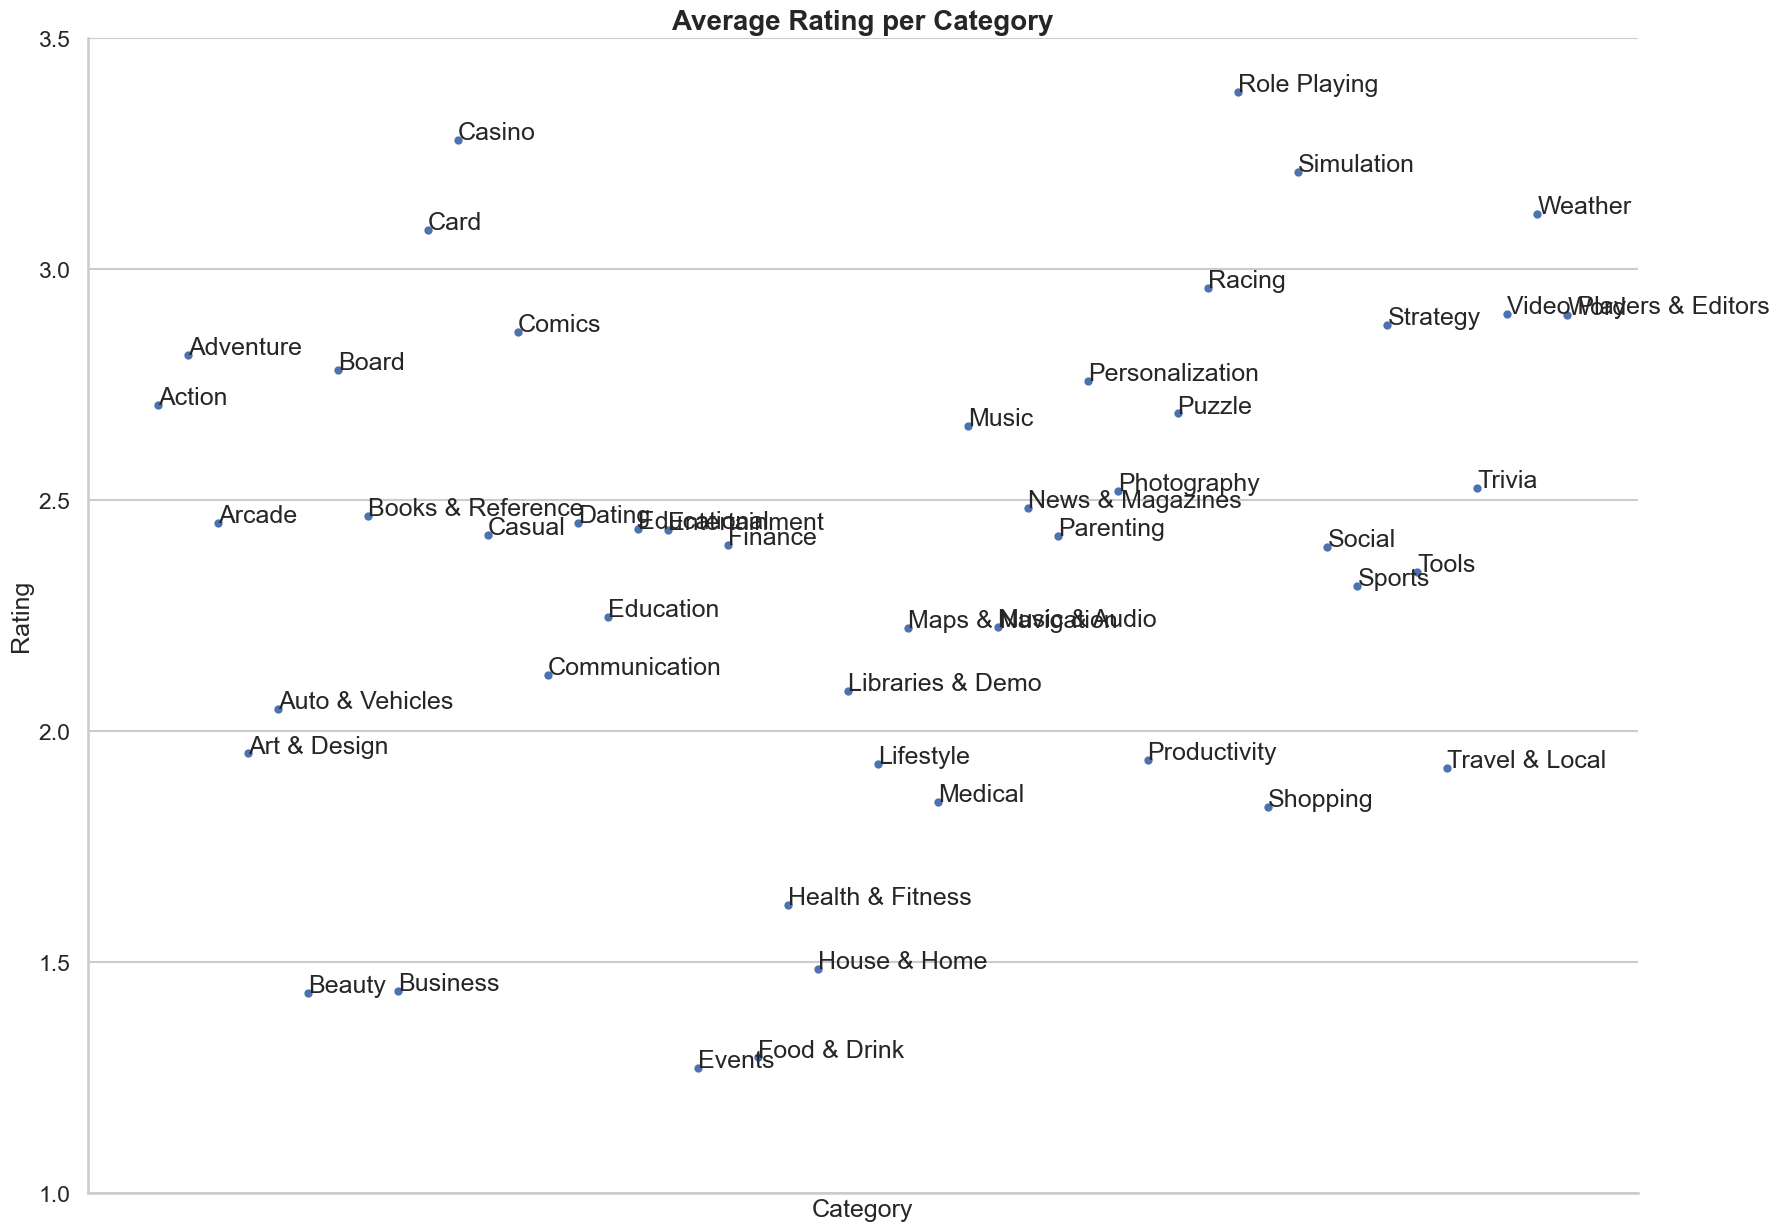

In [5]:
f,ax=mplp.subplots(figsize=(20,15))
arpc=pd.DataFrame(data.groupby('Category')['Rating'].mean())
arpc.reset_index().plot(kind='scatter',y='Rating',x='Category',ax=ax)
for i in range(len(arpc.reset_index())):
    ax.text(x=i,y=arpc.reset_index().Rating[i],s=arpc.reset_index().Category[i])
ax.set_xticks([])
ax.set_ylim(1,3.5)
ax.set_title('Average Rating per Category',fontsize=20 ,fontweight='bold')
sns.despine()



### What is the rating difference between free and paid apps? 

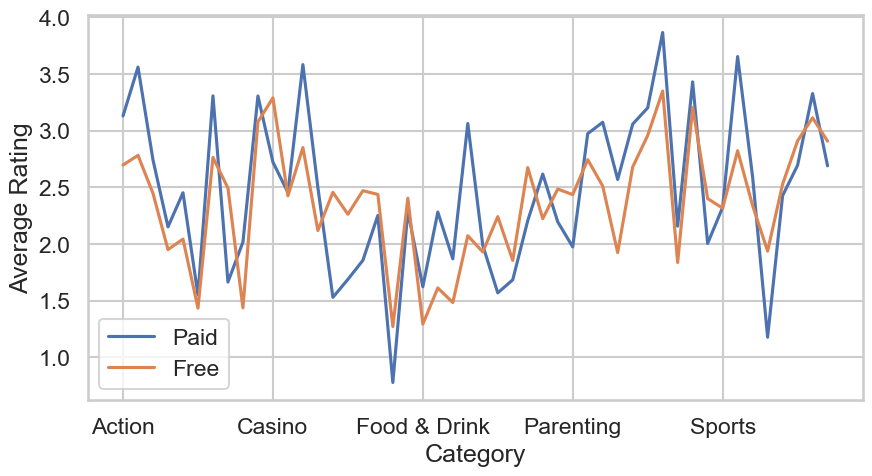

In [6]:
f,ax=mplp.subplots(figsize=(10,5))
data[data.Rating.notna()].groupby(['Category','Free']).Rating.mean().unstack().plot(kind='line',ax=ax)
ax.legend(['Paid','Free'])
ax.set_ylabel("Average Rating")
mplp.show()

### Does app install decrease with price?

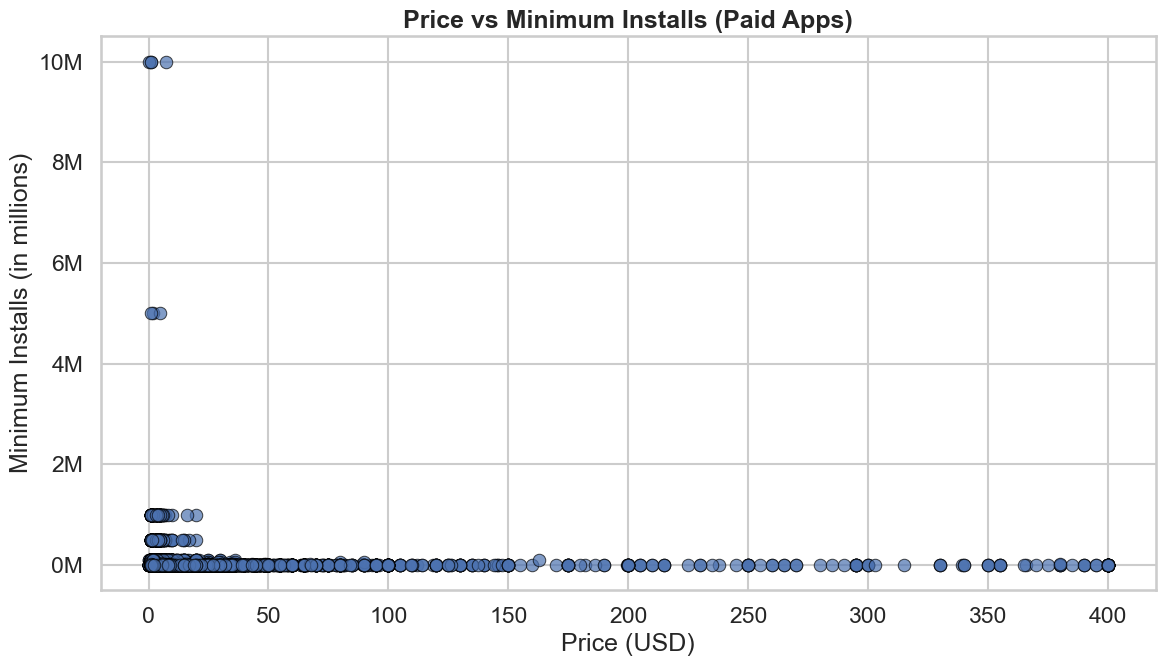

In [7]:
paid = data[~data.Free][['App Name','Price','Minimum Installs']]

sns.set(style="whitegrid", context="talk")  

mplp.figure(figsize=(12,7))  
ax = sns.scatterplot(
    data=paid,
    x='Price',
    y='Minimum Installs',
    alpha=0.7,               
    edgecolor='black'        
)

from matplotlib.ticker import FuncFormatter

ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x/1000000)}M"))

mplp.title("Price vs Minimum Installs (Paid Apps)", fontweight='bold')
mplp.xlabel("Price (USD)")
mplp.ylabel("Minimum Installs (in millions)")

mplp.tight_layout()
mplp.show()


#### Checking Coorrelation between Price and Number of Installs

In [32]:
data['Price'].corr(data['Minimum Installs'])

np.float64(-0.0004606862515294128)

#### Coorrelation of  0 suggest that there is no any coorrelation between installs and price of apps

### Which age group is targeted the most?

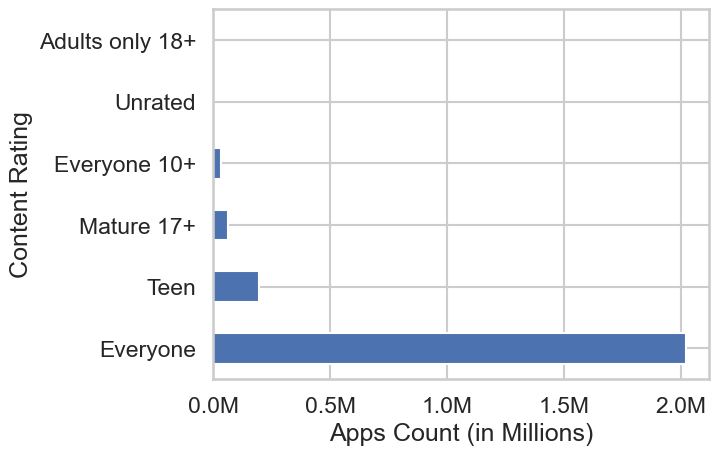

In [8]:
data['Content Rating'].value_counts().plot(kind='barh')
mplp.xlabel('Apps Count (in Millions)')

from matplotlib.ticker import FuncFormatter

mplp.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{float(x/1000000)}M"))
mplp.show()

#### Percentage Distribution of Content Ratings:

In [57]:
crp=data['Content Rating'].value_counts(normalize=True)*100
crp.reset_index()

,Content Rating,proportion
0,Everyone,87.424901
1,Teen,8.490262
2,Mature 17+,2.606591
3,Everyone 10+,1.465708
4,Unrated,0.006658
5,Adults only 18+,0.005880


In [9]:
import numpy as np

def convert_size(x):
    if isinstance(x, str):
        x = x.strip().lower().replace(',', '')  # remove commas
        
        if 'm' in x:
            return float(x.replace('m',''))               # MB stays MB
        if 'k' in x:
            return float(x.replace('k','')) / 1024        # KB → MB
            
        # no M/k, but a number
        try:
            return float(x)
        except:
            return np.nan
    return np.nan

data['Size'] = (
    data['Size'].apply(convert_size)   # from previous function
    .round()                           # round the float to nearest integer
    .astype('Int64')                   # safe integer with NaN support
)



### PLot of App_Size vs Number of Installs!

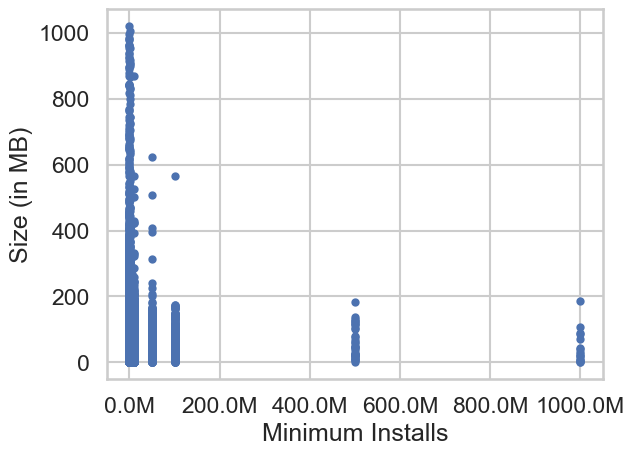

In [10]:
data[data.Size.notna()][['App Name','Size','Minimum Installs']].plot(kind='scatter',y='Size',x='Minimum Installs')
from matplotlib.ticker import FuncFormatter

mplp.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{float(x/1000000)}M"))
mplp.ylabel('Size (in MB)')

mplp.show()

Most apps are small to medium-sized with low to moderate installs.


The number of installs does not strongly depend on app size.

### Top Rated Apps Per Category (Minimum 100000 Installs)

In [14]:
abd=data[data['Minimum Installs']>1000000].groupby('Category').agg(maxr=('Rating','max'))
rc=data[data['Minimum Installs']>1000000].merge(abd.reset_index().rename(columns={'maxr':'Rating'}),on=['Rating','Category'])
highest_rating_per_category=rc[['Category','App Name','Rating']].sort_values(by=['Rating'],ascending=False)
#make a csv file of the data
highest_rating_per_category

,Category,App Name,Rating
19,Music & Audio,"Kuku FM - Love Stories, Audio Books & Podcasts",5.0
128,Video Players & Editors,Video maker with photo & music,5.0
114,Photography,Photo Frame,5.0
84,Entertainment,Maps Master for Minecraft,5.0
70,Books & Reference,Holy Bible,4.9
...,...,...,...
63,Music,DEEMO,4.6
127,Music,Smash Colors 3D - Free Beat Color Rhythm Ball ...,4.6
87,Dating,Hily Dating App: Connect singles. Find love. D...,4.5
36,Libraries & Demo,MX Player Codec (ARMv7 NEON),4.4


### What percentage of apps are ad-supported or offer in-app purchases?

In [67]:
len(data[data['In App Purchases'] | data['Ad Supported']])/len(data)*100

52.07367752958999

### Distribution of App Monetization Strategies

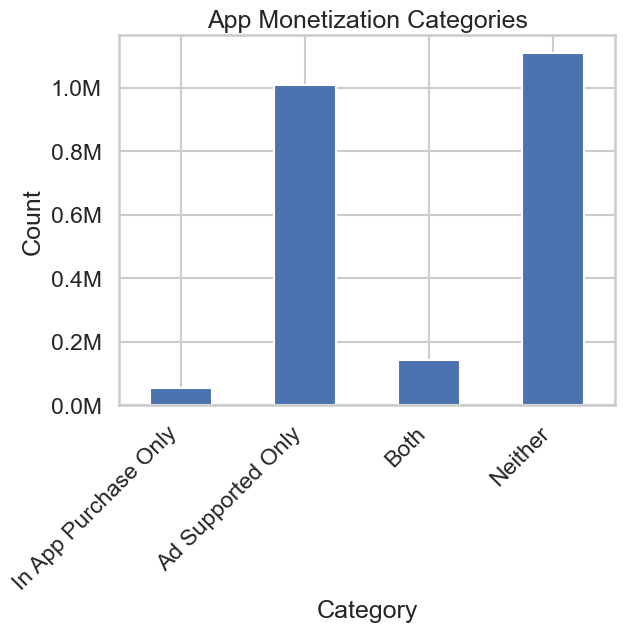

In [86]:

badiap  = data[data['Ad Supported'] & data['In App Purchases']]           
oiap    = data[~data['Ad Supported'] & data['In App Purchases']]          
oad     = data[data['Ad Supported'] & ~data['In App Purchases']]          
nbadiap = data[~data['Ad Supported'] & ~data['In App Purchases']]         

# Create summary DataFrame (values must be list-like)
summary = pd.DataFrame({
    'In App Purchase Only': len(oiap),
    'Ad Supported Only': len(oad),
    'Both': len(badiap),
    'Neither': [len(nbadiap)]
})


summary.T.plot(kind='bar') 

mplp.xlabel('Category')
mplp.ylabel('Count')
mplp.title('App Monetization Categories')
mplp.xticks(rotation=45,ha='right')
mplp.legend().set_visible(False)
mplp.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{float(x/1000000)}M"))
mplp.show()


### High Installs (>1000000) But Low Ratings


In [ ]:
hilr=data[(data.Rating<2) & (data['Minimum Installs']>1000000)][['App Name','Category','Minimum Installs','Rating']].sort_values(by='Rating').reset_index().drop(columns='index')
hilr.to_excel('high_install_low_ratings.xlsx')
hilr

,App Name,Category,Minimum Installs,Rating
0,Bonus Offer,Entertainment,5000000.0,0.0
1,Motu Patlu King of Hill Racing,Racing,5000000.0,0.0
2,Internet Browser for Sony TV,Communication,5000000.0,0.0
3,BRAVIA™ Help,Lifestyle,10000000.0,0.0
4,Home Theater Control,Personalization,10000000.0,0.0
5,Android TV Home,Tools,50000000.0,1.1
6,Testfoni,Social,10000000.0,1.3
7,YouTube Music,Music & Audio,10000000.0,1.4
8,Google Family Link for children & teens,Tools,10000000.0,1.4
9,Amazon Widget,Shopping,5000000.0,1.4


### Distribution of App ratings

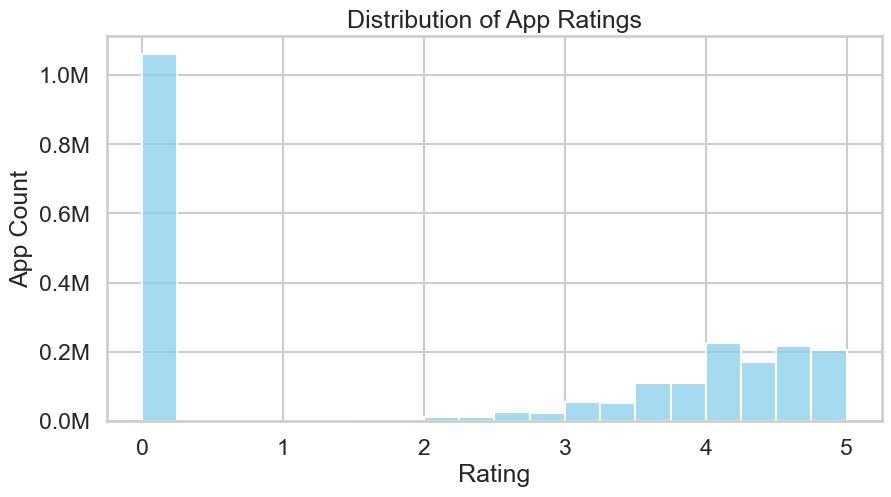

In [18]:
mplp.figure(figsize=(10, 5))
sns.histplot(data['Rating'], bins=20, color='skyblue')
mplp.title('Distribution of App Ratings')
mplp.xlabel('Rating')
mplp.ylabel('App Count')
mplp.grid(True)
mplp.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{float(x/1000000)}M"))
mplp.show()

### Top 10 Apps by Maximum Installs:

Text(0.5, 1.0, 'Top 10 Apps by Maximum Installs !')

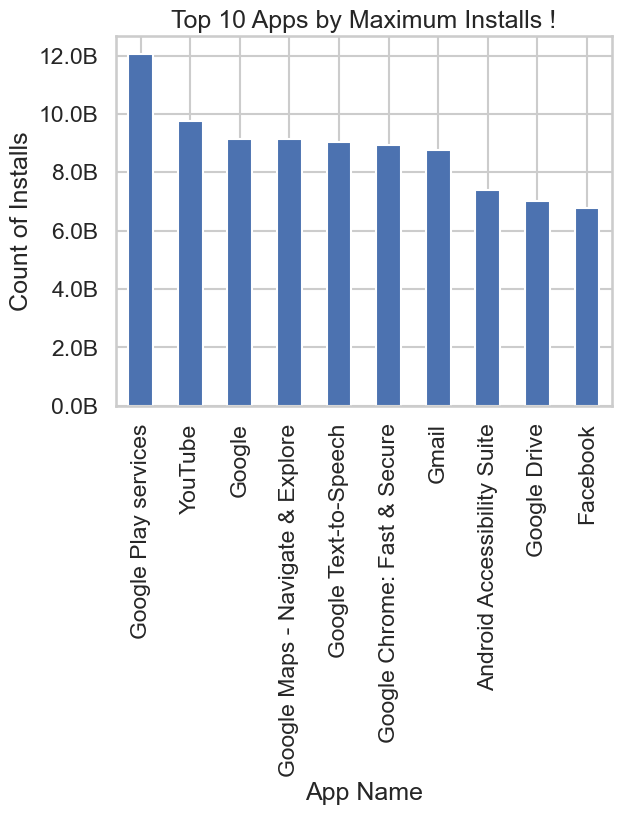

In [31]:
data.sort_values(ascending=False, by='Maximum Installs').head(10)[['App Name','Maximum Installs']].plot(kind='bar',x='App Name',y='Maximum Installs')
mplp.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{float(x/1000000000)}B"))
mplp.legend().set_visible(False)
mplp.ylabel('Count of Installs')
mplp.title('Top 10 Apps by Maximum Installs !')
